# Statistik Raport
---

**Målet med denna raport är att presentera resulatet för av undersökningen om mängden hästkrafter i amerikanska bilar skiljer sig från de europeiska bilarna samt för att se hur hästkrafterna för ett fordon kan påverka en bils bränsleförbrukningen.**


#### Frågeställningar: 

- om mängden hästkrafter i amerikanska bilar skiljer sig från de europeisk bilarna.
- hur hästkrafterna för en bil kan påverka mpg (miles per gallon).


---

**Jag börjar med att försöka svara på den första frågeställningen.**

**För att få svar på första frågeställningen, börjar jag med att räkna ut medel värdet av hästkrafter för de Amerikanska och Europeiska bilarna. Anleddnignen till varför jag väljer att ta ut medelvärdet för de olika grupperna är för att kunna få ett representativt värde för hela gruppen för att sen lättare kunna jämföra dem.**

**För att kunna ta ut medel värdet av de olika grupprena ränsar jag först dataframen för att få bort data som jag inte behöver. Jag anväder sen `numpy.mean()` för att ta ut medel värdet för grupperna igenom att sortera ut 'hästkrafterna' för Amerikanska och Europeiska bilarna.**

`mu_usa = np.mean(df_cars[df_cars["origin"] == "usa"]["horsepower"])`

`mu_eu = np.mean(df_cars[df_cars["origin"] == "europe"]["horsepower"])`

**Efter att ha tagit ut medel värdena har jag valt att plota 'hästkraftena' med en histplot från seaborn för att få en bättre bild över hur grupperna är updelade.**

**Jag valde sen att plota ut medelvärdena i linjer över histogramet för att lätt kunna jämnföra medlvärdena.**

In [1]:
# importera dependences 
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns

# filepath
file_path = "../Datasets/cars.csv"

# hämta datasetet.
df_cars = pd.read_csv(file_path)

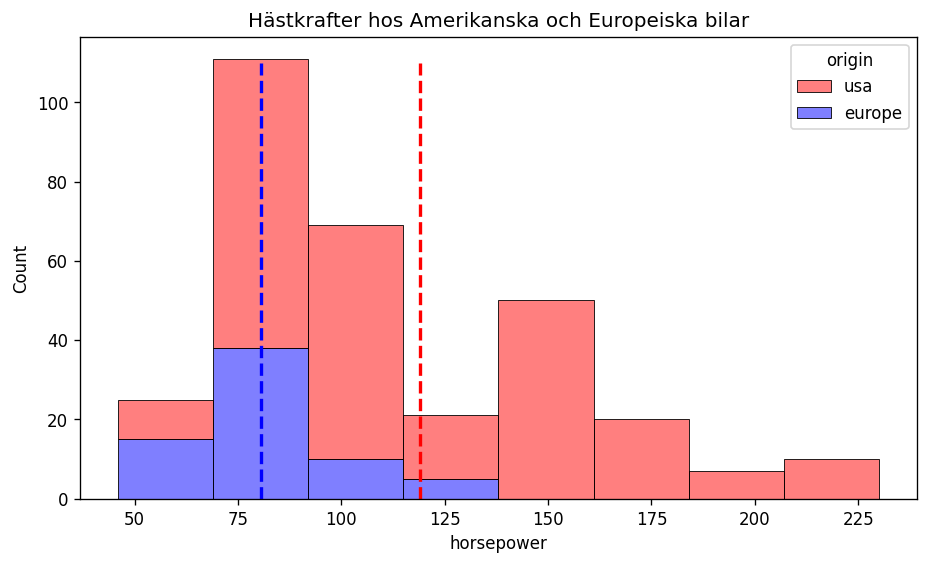

Mean: USA: 119.05, EU: 80.56


In [2]:
# sorterar datan på vart bilarna kommer ifrån.
to_drop = df_cars[df_cars["origin"] == "japan"].index # tar ut index för alla japanska bilar.
df_cars.drop(to_drop, inplace=True) # dropar alla med index från to_drop.

# dropar alla nan values från dataframen.
df_cars.dropna(inplace=True)

# beräkna mu för eu och usa.
mu_usa = np.mean(df_cars[df_cars["origin"] == "usa"]["horsepower"])
mu_eu = np.mean(df_cars[df_cars["origin"] == "europe"]["horsepower"])

# skapar en subplot.
fig, ax = plt.subplots(1, 1, figsize=(9, 5), dpi=120)

# plotar horsepower för Usa och Europe. (röd och blå)
sns.histplot(
    data=df_cars,
    x="horsepower",
    hue="origin",
    bins=8,
    linewidth=0.5,
    multiple="stack",
    palette=["red", "blue"],
    alpha=0.5,
)
plt.plot(
    [mu_usa, mu_usa],
    [0, 110],
    color="red",
    linestyle="--",
    linewidth=2,
    label="Medelvärde",
)  # plotar medelvärdet för usa.
plt.plot(
    [mu_eu, mu_eu],
    [0, 110],
    color="blue",
    linestyle="--",
    linewidth=2,
    label="Medelvärde",
)  # plotar medelvärdet för eu.

# titlen för ploten
ax.set_title("Hästkrafter hos Amerikanska och Europeiska bilar")
plt.show()

# skriver ut medlvärdena för eu och usa.
print(f"Mean: USA: {round(mu_usa, 2)}, EU: {round(mu_eu, 2)}")



---
**mean: USA: 119.05, EU: 80.56** 

---

**Som man kan se från grafen åvan kan man lätt se att medelvärdet för amerikanska bilar är ganska mycket stören en de europeiska bilarna. En grej att tänka på är att stickprovet för USA är betydligt störe en de för EU vilket kan ledda till att medelvärdet för EU kan ha en störe felmarginal.**

**För att verkligen testa om deta stämmer har jag även valt att göra ett hypotestest (t-test) för att verkligen kontrollera att det är någon skillnad på populationerna.**

**För att göra t-testet började jag med att sätta upp hypotesen för den, jag väljer även att göra testet med en significans nivå på 95%.**

---

$H_A: \mu_{usa} \neq \mu_{eu}$

$H_0: \mu_{usa} = \mu_{eu}$

$a = 0.05$

---

**Innan jag gör t-testet gör jag ett f-test för att ta reda på om jag ska sätta `equal_var` till True or False.**

**Jag räknar ut f-testet igenom att använda `numpy` för att räkna ut f-stat och `scipy` för att räkna ut f-crit**

In [18]:
from scipy.stats import f

# kalkylera F-stat igenom att ta var av usa och eu cars och dela dem på varandra.
f_stat = np.var(df_cars[df_cars["origin"] == "usa"]["horsepower"], ddof=1) / np.var(
    df_cars[df_cars["origin"] == "europe"]["horsepower"], ddof=1
)

# kalkylera df1 och df1 igenom n - 1.
df1 = len(df_cars[df_cars["origin"] == "usa"]) - 1
df2 = len(df_cars[df_cars["origin"] == "europe"]) - 1

# alpha value (significance).
a = 0.05

# kalkylera f_crit.
f_crit = f.ppf(q=a, dfn=df1, dfd=df2)

# printar slutsats.
print(f"f-crit: {round(f_crit, 2)}, f-stat: {round(f_stat, 2)}, f-crit > f-stat = {f_crit > f_stat}")

f-crit: 0.74, f-stat: 3.92, f-crit > f-stat = False



---

**Som man kan se från svaret på f-testet är f-crit inte större än f-stat vilket innebär att de två varianserna på det två populationerna kan ses som lika, vilket betyder att `equal_var = True`.**

**Efter att ha tagitreda på vad `equal_var` ska vara gick jag vidare till att göra t-testet, för att göra t-testet använde jag `ttest_ind` funktionen, där jag satte `a` som hästkrafter för USA och `b` för EU.**

---

In [4]:
from scipy.stats import ttest_ind

result = ttest_ind(
    a=df_cars[df_cars["origin"] == "usa"]["horsepower"],
    b=df_cars[df_cars["origin"] == "europe"]["horsepower"],
    equal_var=True,
    alternative="two-sided",
)
print(result)


Ttest_indResult(statistic=7.681404142807087, pvalue=2.0653368475960042e-13)



---

**Som man kan se från resultatet från t-testet är p-value mycket mindre än det givna significans värdet vilket innbär att man kan kasta noll hypotesen, efter som att p-value är så litet betyder det även att det är en stor skillnad på medelvärdet av de två populationerna.**

**Deta betyder även att det förata svaret var mer eller mindre korrekt. deta ledder även till att svaret på den första frågeställningen är ja det är en skillnade på hästkrafter mellan Amerikanska och Europeiska.**

---

**Efter att ha svarat på första frågan går jag över till att svara på fråga två.**


- hur hästkrafterna för en bil kan påverka mpg (miles per gallon).

---

**Jag valde att svara på den fråga igenom att dela upp den på Amerikanska och Europeiska bilar för att hålla mig lite till den första frågeställningen deta innebär även att jag kan jämföra resultaten mellan de två grupperna.**

**För att svara på fråga två har jag valt att använda mig av en linjär reggression både för att kunna enkelt visuelisera hur hästkrafter och mpg påverkar varandra men också för att kunna göra en prediction om vad en bil med enviss mängd hästkrafter skulle ha i mpg**

**Jag använder mig av seaborns `lmplot` för att plota den linjära reggressionen.**

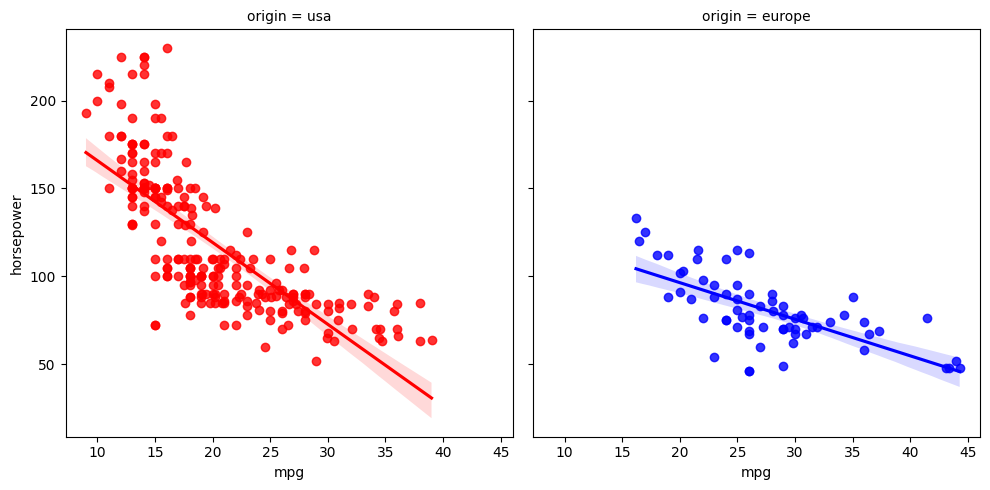

In [5]:
# plotar linjära regressionen för usa och eu när det kommer till -
# korrelationen mellan hästkrafter och mpg.
sns.lmplot(
    data=df_cars,
    x="mpg",
    y="horsepower",
    col="origin", # gör fler grafer baserat på columnen origin.
    hue="origin",
    palette=["red", "blue"],
)
# fixar ram runt plotarna för att göra det lättare att läsa.
sns.despine(bottom=False, left=False, right=False, top=False)



---

**Från det två plotade regressionerna kan man se att det finns en korrilation mellan mängden hästkrafterna och mpg där man kan se att destufler häskrafter en bil har ju sämmre kommer mpg att vara.**

**Om man jämför de två graferna kan man se att bilarna i EU verkar ha lite bättre bränsle förbukning när det kommer till hästkrafter en vad USA har, detta kan bero på att EU har ett midnre stickprov, EU har häller inte lika många olika datapunkter när det kommer till hästkrafter som USA vilket kan på verka resultatet.**

**För att göra en prediction på de två grupperna, använder jag `statsmodels` `ols`. Jag skapar även en ny dataframe som håller i de hästkrafterna som jag vill predikata mpg på.**

---

In [19]:
from statsmodels.formula.api import ols

usa_model = ols("mpg ~ horsepower", data=df_cars[df_cars["origin"] == "usa"]).fit()
eu_model = ols("mpg ~ horsepower", data=df_cars[df_cars["origin"] == "europe"]).fit()

pre = pd.DataFrame([80], columns=["horsepower"])

usa_ypred = usa_model.predict(pre)
eu_ypred = eu_model.predict(pre)

print(f"USA: {usa_ypred}")
print(f"EU: {eu_ypred}")

USA: 0    24.770893
dtype: float64
EU: 0    27.726908
dtype: float64



---

**Om man jämför resultaten på de olika prediktionerna kan man se hur de följer samma tränd där EU verkar ha lite bättre mpg. Men en grej att tänka på är att resultatet för EU kan ha en större felmarginal en USA på grund utav det tidigare nämnda stickprovs storleken, Detta innebär också att ju längre ifrån tränings datans man kommer ju störe kommer felmarginalerna för de båda grupperna att vara.**

**Så svaret till fråga två är att ja det finns en korrelation mellan hästkrafter och mpg, man kan även med en viss felmarginal förutspå mpg med hästkrafter på en bil. som en bit extra information kan man även se att EUs bilar verkar ha en bättre bränsle förbrukning när det kommer till hästkrafter.**



#### Slutsats

**Som en slutsats till raporten har jag lyckats svara på de frågeställningarna jag ställt och kommit fram till att det är en ganska stor skillnad mellan hästkrafterna hos Amerikanska och Europeiska bilar, där USA har igenom snitt mer hästkrafter en i EU baserat på den givna datan. jag har även i raporten kommit fram till att det finns en korelation mellan antalet hästkrafter och mpg, där mpg tycks försämras destu mer hästkrafter som bilen har.**

---

<AxesSubplot: >

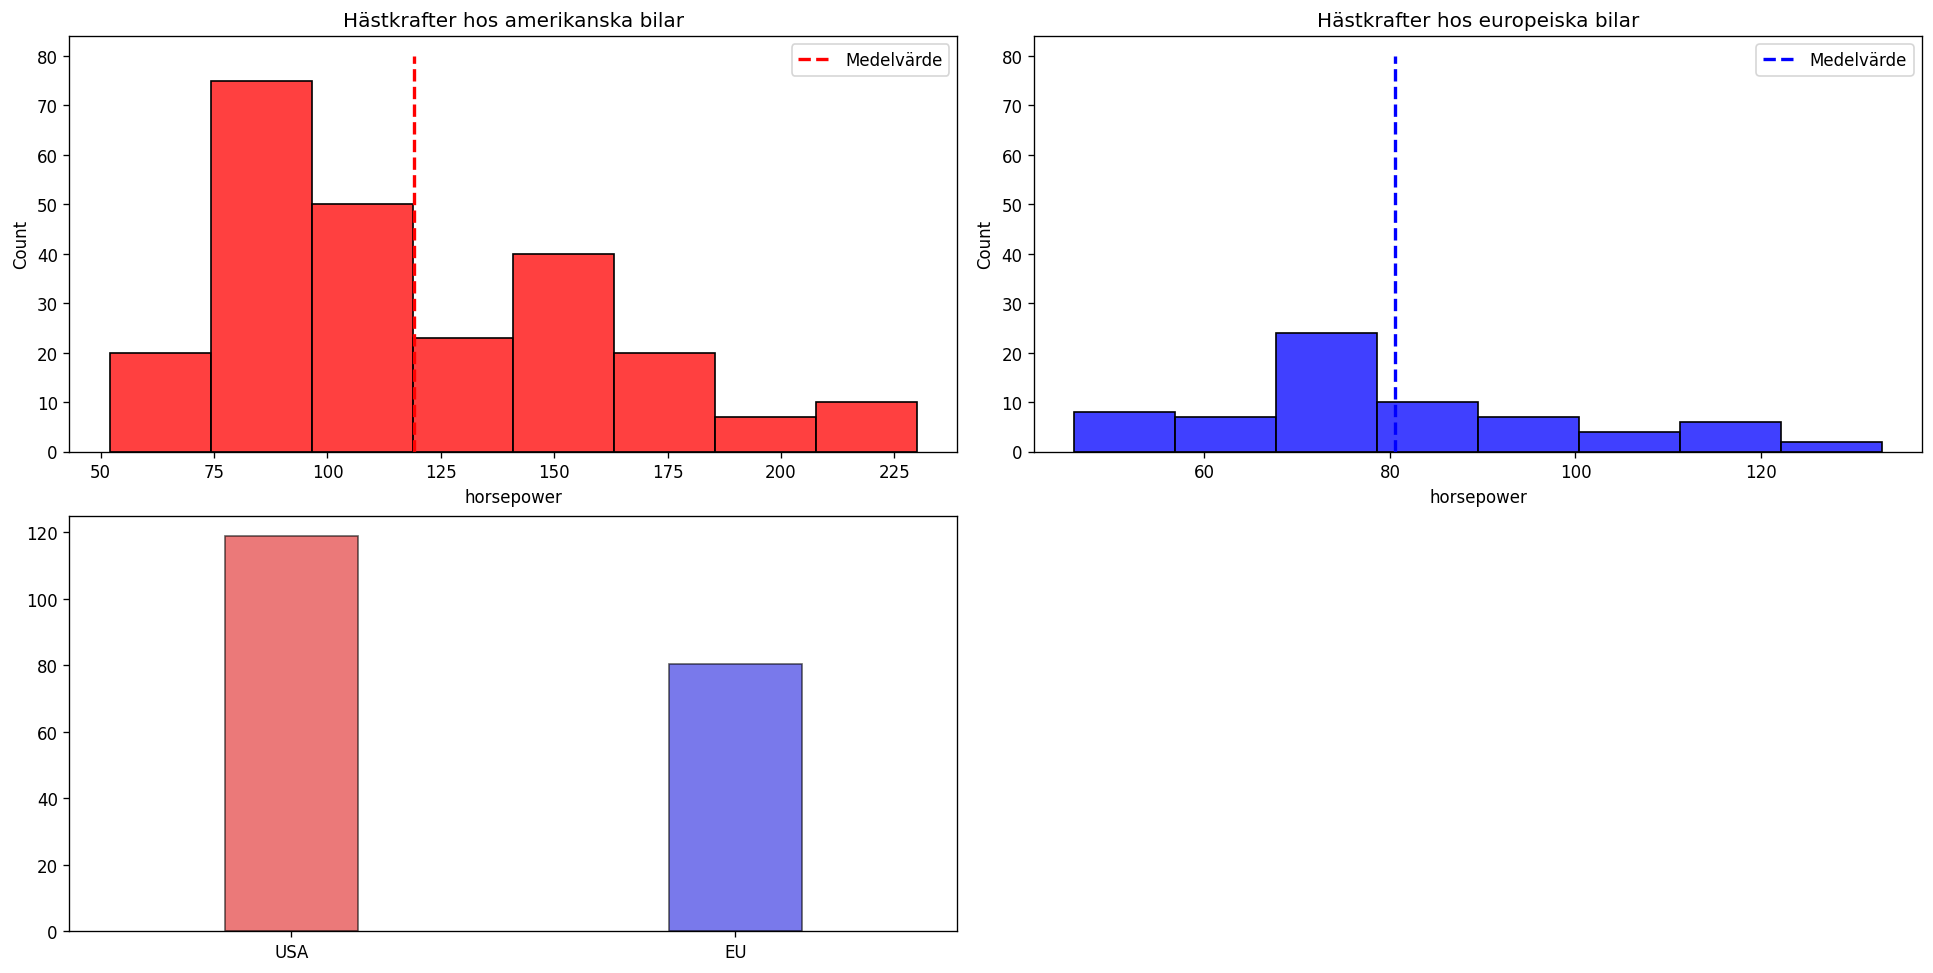

In [7]:
mu_data = {"x": ["USA", "EU"], "y": [mu_usa, mu_eu]}

# skapar subplots för att bygga ett grid.
fig = plt.figure(figsize=(16, 8), dpi=120, constrained_layout = True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[0, 1])
ax2 = fig.add_subplot(spec[1, 0])

sns.histplot(data=df_cars[df_cars["origin"] == "usa"], x="horsepower", bins=8, ax=ax0, multiple="dodge", color="red")
ax0.plot([mu_usa, mu_usa], [0, 80], color='red', linestyle='--', linewidth=2, label='Medelvärde')
ax0.set_title("Hästkrafter hos amerikanska bilar")
ax0.legend(loc='upper right')

sns.histplot(data=df_cars[df_cars["origin"] == "europe"], x="horsepower", bins=8, ax=ax1, color="blue")
ax1.plot([mu_eu, mu_eu], [0, 80], color='blue', linestyle='--', linewidth=2, label='Medelvärde')
ax1.set_title("Hästkrafter hos europeiska bilar")
ax1.legend(loc='upper right')

sns.barplot(data=mu_data, x="x", y="y", ax=ax2, width=0.3, palette=["red", "blue"], edgecolor="black", alpha=0.6)